# Profil
1.   nama : Ruli Sastra Putri
2.   email : rulisastra@gmail.com
3.   no.hp : 082137371099
4.   kota : Palembang

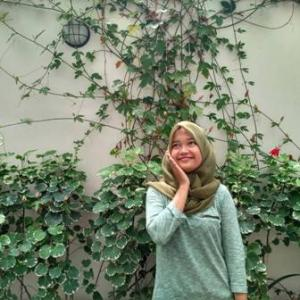

# **Pre-processing**

In [3]:
# drive
from google.colab import drive
drive.mount('/content/drive')
import zipfile,os
import shutil

# tensorflow
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Activation, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm

# lainnya
from PIL import Image
import random
from shutil import copyfile
import matplotlib.pyplot as plt

Mounted at /content/drive


In [4]:
# setting direktori
def create_dir(path):
  if os.path.exists(path):
    shutil.rmtree(path)
    os.mkdir(path)
    return path
  else:
    os.mkdir(path)
    return path

base_dir = '/content/drive/My Drive/Colab Notebooks/dataset/rockpaperscissors'

In [5]:
# variabel penyimpanan untuk training dan validation
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

rock_dir = os.path.join('/content/drive/My Drive/Colab Notebooks/dataset/rockpaperscissors/rock')
paper_dir = os.path.join('/content/drive/My Drive/Colab Notebooks/dataset/rockpaperscissors/paper')
scissors_dir = os.path.join('/content/drive/My Drive/Colab Notebooks/dataset/rockpaperscissors/scissors')

In [6]:
# lihat banyak data image
print("image rocks ada: ",len(os.listdir(rock_dir)))
print("image papers ada: ",len(os.listdir(paper_dir)))
print("image scissors ada: ",len(os.listdir(scissors_dir)))

image rocks ada:  726
image papers ada:  712
image scissors ada:  750


## pisah data

In [7]:
# pisah data
from sklearn.model_selection import train_test_split

train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [11]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [13]:
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

In [14]:
# pengecekan directory
if not os.path.exists(train_rock):
    os.mkdir(train_rock)
if not os.path.exists(train_paper):
    os.mkdir(train_paper)
if not os.path.exists(train_scissors):
    os.mkdir(train_scissors)

if not os.path.exists(val_rock):
    os.mkdir(val_rock)
if not os.path.exists(val_paper):
    os.mkdir(val_paper)
if not os.path.exists(val_scissors):
    os.mkdir(val_scissors)

In [15]:
# copy data train ke directory baru
for i in train_rock_dir:
    shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
    shutil.copy(os.path.join(paper_dir, i), os.path.join(train_paper, i))
for i in train_scissors_dir:
    shutil.copy(os.path.join(scissors_dir, i), os.path.join(train_scissors, i))

# copy data validation ke directory baru
for i in val_rock_dir:
    shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock, i))
for i in val_paper_dir:
    shutil.copy(os.path.join(paper_dir, i), os.path.join(val_paper, i))
for i in val_scissors_dir:
    shutil.copy(os.path.join(scissors_dir, i), os.path.join(val_scissors, i))

In [17]:
# jumlah data train
data_rock_train = len(os.listdir('/content/drive/My Drive/Colab Notebooks/dataset/rockpaperscissors/train/rock'))
data_paper_train = len(os.listdir('/content/drive/My Drive/Colab Notebooks/dataset/rockpaperscissors/train/paper'))
data_scissors_train = len(os.listdir('/content/drive/My Drive/Colab Notebooks/dataset/rockpaperscissors/train/scissors'))
print("Total Data Training: ", (data_rock_train + data_paper_train + data_scissors_train))

# jumlah data validate
data_rock_validation = len(os.listdir('/content/drive/My Drive/Colab Notebooks/dataset/rockpaperscissors/val/rock'))
data_paper_validation = len(os.listdir('/content/drive/My Drive/Colab Notebooks/dataset/rockpaperscissors/val/paper'))
data_scissors_validation = len(os.listdir('/content/drive/My Drive/Colab Notebooks/dataset/rockpaperscissors/val/scissors'))
print("Total Data Validation: ", (data_rock_validation + data_paper_validation + data_scissors_validation))

Total Data Training:  1312
Total Data Validation:  876


In [18]:
print("data rock: ", len(os.listdir('/content/drive/My Drive/Colab Notebooks/dataset/rockpaperscissors/train/rock')))
print("data paper: ", len(os.listdir('/content/drive/My Drive/Colab Notebooks/dataset/rockpaperscissors/train/paper')))
print("data scissors: ", len(os.listdir('/content/drive/My Drive/Colab Notebooks/dataset/rockpaperscissors/train/scissors')))

data rock:  435
data paper:  427
data scissors:  450


In [19]:
print("data rock: ", len(os.listdir('/content/drive/My Drive/Colab Notebooks/dataset/rockpaperscissors/val/rock')))
print("data paper: ", len(os.listdir('/content/drive/My Drive/Colab Notebooks/dataset/rockpaperscissors/val/paper')))
print("data scissors: ", len(os.listdir('/content/drive/My Drive/Colab Notebooks/dataset/rockpaperscissors/val/scissors')))

data rock:  291
data paper:  285
data scissors:  300


# Processing

## image data generator - PIL

In [22]:
# set data generator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range=0.2,
    fill_mode='nearest',
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [24]:
# klasifikasi Image Data Generator
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

# klasifikasi training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    shuffle=True,
    batch_size=32,
    class_mode='categorical'
)

# klasifikasi validasi
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode = 'categorical',
    color_mode='rgb'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


## model arsitektur network - KERAS

In [25]:
# layer Conv2D
# fungsi aktivasi ReLu

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Dense(123, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(3))
model.add(Activation('sigmoid'))

# print summary
print(model.summary())

# learning rate dengan RMSprop(0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(0.0001),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       2

### training dan validation

In [ ]:
# melihat proses training, sekitar 
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=2
)

Epoch 1/25
41/41 - 110s - loss: 0.9772 - accuracy: 0.5419 - val_loss: 1.0710 - val_accuracy: 0.6430
Epoch 2/25
41/41 - 105s - loss: 0.6596 - accuracy: 0.7713 - val_loss: 1.0533 - val_accuracy: 0.5126
Epoch 3/25
41/41 - 105s - loss: 0.4787 - accuracy: 0.8826 - val_loss: 1.0235 - val_accuracy: 0.4954
Epoch 4/25
41/41 - 106s - loss: 0.3821 - accuracy: 0.9085 - val_loss: 0.9745 - val_accuracy: 0.4977
Epoch 5/25
41/41 - 106s - loss: 0.2990 - accuracy: 0.9299 - val_loss: 0.8899 - val_accuracy: 0.7746
Epoch 6/25
41/41 - 105s - loss: 0.2459 - accuracy: 0.9505 - val_loss: 0.8180 - val_accuracy: 0.8501
Epoch 7/25
41/41 - 110s - loss: 0.2209 - accuracy: 0.9474 - val_loss: 0.7214 - val_accuracy: 0.9291
Epoch 8/25
41/41 - 105s - loss: 0.2086 - accuracy: 0.9421 - val_loss: 0.6548 - val_accuracy: 0.9199
Epoch 9/25
41/41 - 105s - loss: 0.1765 - accuracy: 0.9558 - val_loss: 0.5384 - val_accuracy: 0.9153
Epoch 10/25
41/41 - 106s - loss: 0.1652 - accuracy: 0.9558 - val_loss: 0.7875 - val_accuracy: 0.5378

In [ ]:
# hasil : loss dan akurasi
model_score = model.evaluate(train_generator,steps=10)

print("Model Test Loss:",model_score[0]*100)
print("Model Test Accuracy:",model_score[1]*100)

10/10 [==============================] - 7s 675ms/step - loss: 0.1091 - accuracy: 0.9500
Model Test Loss: 10.91369017958641
Model Test Accuracy: 94.9999988079071


In [ ]:
# simpan bobot hasil training
model_base_path = '/content/drive/My Drive/Colab Notebooks/dataset/rockpaperscissors/'
model_name = 'rockpaperscissors_model.h5'
model_path = os.path.join(model_base_path, model_name)

print('Saving Model At {}...'.format(model_path))
model.save_weights(model_path)

Saving Model At /content/drive/My Drive/Colab Notebooks/dataset/rockpaperscissors/rockpaperscissors_model.h5...


## diagram - MATPLOTLIB

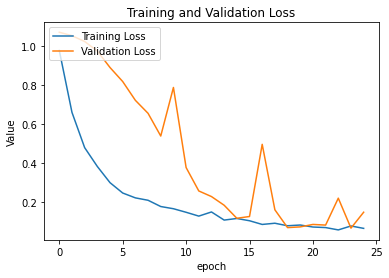

In [ ]:
# plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

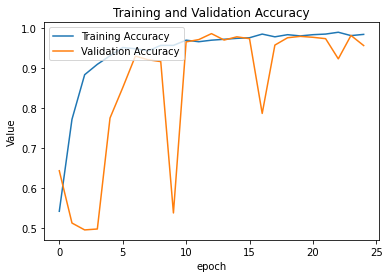

In [ ]:
# plot akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Value')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

# Post-processing

## testing

Saving 0cb6cVL8pkfi4wF6.png to 0cb6cVL8pkfi4wF6.png
hasil klasifikasi [[1. 0. 0.]]
0cb6cVL8pkfi4wF6.png
------------
ini gambar PAPER


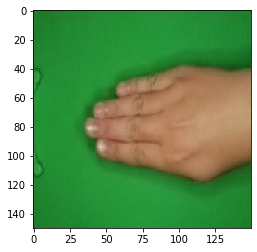

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from tensorflow.keras.models import load_model

# upload image yang ingin diklasifikasi
uploaded = files.upload()

# menggunakan bobot
model.load_weights('/content/drive/My Drive/Colab Notebooks/dataset/rockpaperscissors/rockpaperscissors_model.h5')  

for fn in uploaded.keys():
  # testing
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print("hasil klasifikasi",classes)

  print(fn)
  print("------------")
  if classes[0][0]==1 and classes[0][1]==0 and classes[0][2]==0:
    print("ini gambar PAPER")
  elif classes[0][1]==1 or (classes[0][0]==1 and classes[0][1]==1) :
    print("ini gambar ROCK")
  else:
    print("ini gambar SCISSORS")